<a href="https://colab.research.google.com/github/BhaskarKapri07/Learning-PyTorch/blob/main/Pytorch02_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [91]:
what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [92]:
import torch
from torch import nn    # nn contains all of PyTorche's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

## 1. Data Preparing and Loading

Data can be almost anything ... in machine learning
* Excel spredsheet
* Images of any kind
* Videos
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representations.
2. Build a model to learn patterns in that numerical representation.


To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line as known **parameter**.

In [93]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [94]:
 len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data

In [95]:
# Create a train/test split

train_split = int(0.8 *len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [96]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

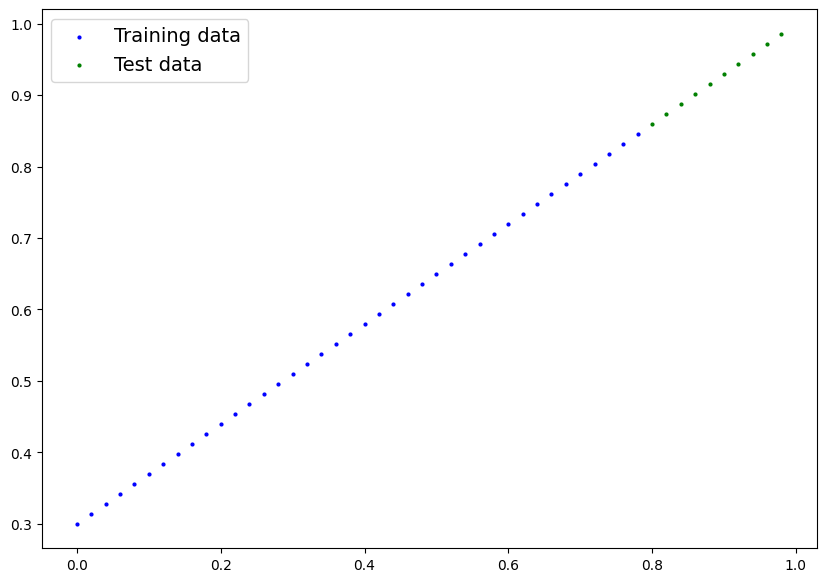

In [97]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weights & biases)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values ( the weight & bias values we used to create the data)


How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [110]:

from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### PyTorch model building essentials

* torch.nn -> contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter -> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module -> The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim -> this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() -> all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the contents of our PyTorch Model

So we can check our model parameters or what's inside our model using `.parameters()`.

In [111]:
# Create a random seed
torch.manual_seed(42)

# Creating an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [112]:
# List named parmeters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through out model, it's goinng to run it through the forward() method

In [113]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [114]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

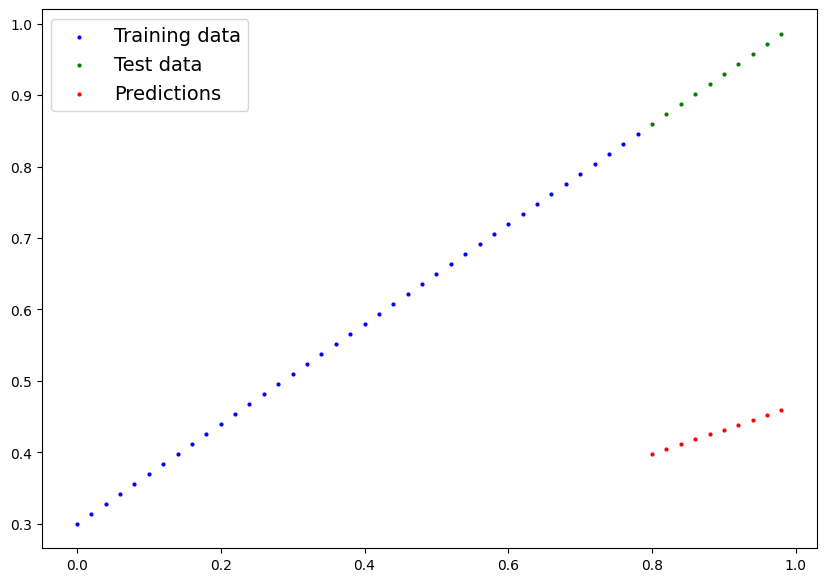

In [115]:
plot_predictions(predictions=y_preds)

## 3. Train model

One way to measure how poor or how wrong your models predictions are is to use loss function

* Note: Loss functions may also be called cost functions or criterion in different areas.


Things we need to train:

* **Loss function:** A function to measure how wrng your model's predictions are to the ideal outputs, lower the better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameter(e.g., weights & bias) to improve the loss function

And specifically for PyTorch we need:
* A training loop
* A testing loop

In [116]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [117]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optmizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)
                 

In [168]:
# An epoch is one loop through the data

epochs = 10
### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()   # train mode in PyTorch sets all parameters that requires gradients to require gradient

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Caluclate loss
  loss = loss_fn(y_pred, y_train)
  print(f'Loss: {loss} ')

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optmizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  #Testing
  model_0.eval()    # turns off different settings in the model not needed for evaluation/testing


  #  Print out model state_dict
  print(model_0.state_dict())


Loss: 0.010031387209892273 
OrderedDict([('weights', tensor([0.6519])), ('bias', tensor([0.3203]))])
Loss: 0.009686763398349285 
OrderedDict([('weights', tensor([0.6534])), ('bias', tensor([0.3193]))])
Loss: 0.009346187114715576 
OrderedDict([('weights', tensor([0.6552])), ('bias', tensor([0.3188]))])
Loss: 0.008997755125164986 
OrderedDict([('weights', tensor([0.6568])), ('bias', tensor([0.3178]))])
Loss: 0.008660981431603432 
OrderedDict([('weights', tensor([0.6586])), ('bias', tensor([0.3173]))])
Loss: 0.008311985060572624 
OrderedDict([('weights', tensor([0.6604])), ('bias', tensor([0.3168]))])
Loss: 0.007972544990479946 
OrderedDict([('weights', tensor([0.6620])), ('bias', tensor([0.3158]))])
Loss: 0.007626785431057215 
OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])
Loss: 0.0072835334576666355 
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Loss: 0.006941580679267645 
OrderedDict([('weights', tensor([0.6672])), ('bias', tensor([0

In [169]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [108]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

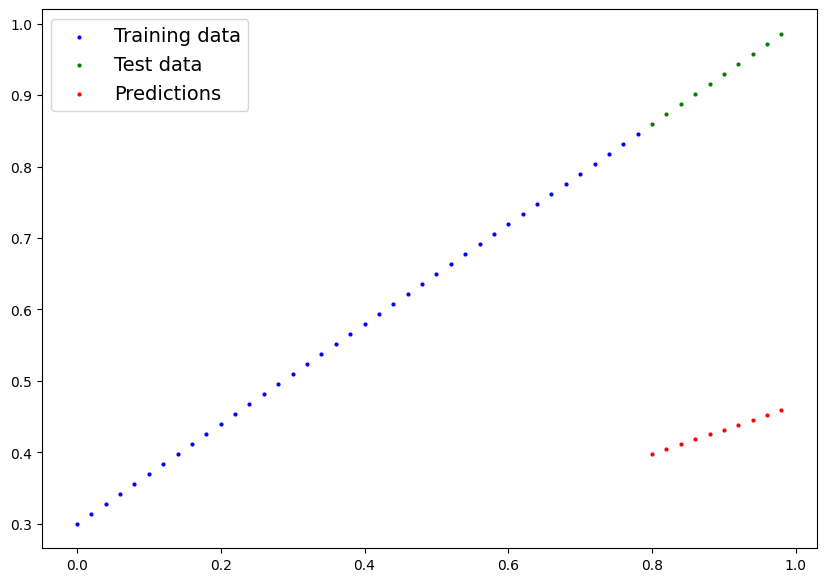

In [157]:
plot_predictions(predictions=y_preds)

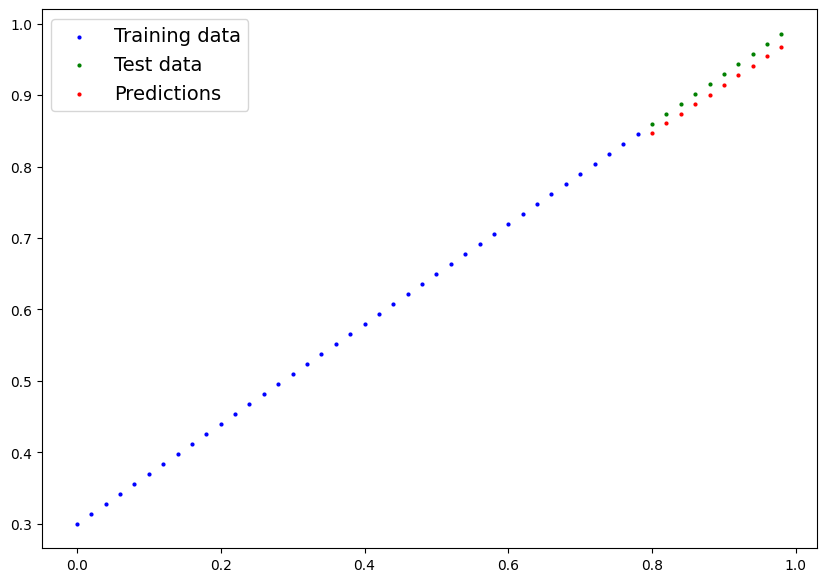

In [170]:
plot_predictions(predictions=y_preds_new)